In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import xgboost as xgb
import numpy as np
from sklearn.metrics import accuracy_score
import mlflow



In [2]:
df=pd.read_csv('final_data2.csv')

In [3]:
# Features and target
X = df.drop(columns=['delay'])  # Drop the target column
y = df['delay']                 # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Define the XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 500],  # Number of trees
    'learning_rate': [0.01, 0.05, 0.1],  # Learning rate
    'max_depth': [3, 6, 10],  # Depth of trees
    'min_child_weight': [1, 5, 10],  # Minimum sum of instance weight in a child
    'subsample': [0.7, 0.8, 1.0],  # Fraction of samples for fitting
    'colsample_bytree': [0.7, 0.8, 1.0],  # Fraction of features for each tree
}
# RandomizedSearchCV with a reduced parameter grid
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # Number of iterations (reduce to make it faster)
    cv=3,  # Number of cross-validation folds
    random_state=42,
    n_jobs=-1,  # Use all CPU cores
    verbose=1
)
mlflow.set_experiment("Truck Delay prediction")
with mlflow.start_run():
    random_search.fit(X_train, y_train)
    
    best_params = random_search.best_params_
    best_model = random_search.best_estimator_
    mlflow.log_param("n_estimators", best_params['n_estimators'])
    mlflow.log_param("learning_rate",best_params['learning_rate'])
    mlflow.log_param("max_depth",best_params['max_depth'])
    mlflow.log_param("min_child_weight",best_params['min_child_weight'])
    mlflow.log_param("min_child_weight",best_params['min_child_weight'])
    mlflow.log_param("subsample",best_params['subsample'])
    mlflow.log_param("colsample_bytree",best_params['colsample_bytree'])



    # Evaluate the best model on test data
    y_pred = best_model.predict(X_test)
    xg_reg_accuracy = accuracy_score(y_test, y_pred)
    

    mlflow.log_metric("xg_reg_accuracy",xg_reg_accuracy)
    mlflow.sklearn.log_model(best_model,"XG Boost model") # model, foldername

Fitting 3 folds for each of 20 candidates, totalling 60 fits


2025/01/08 22:06:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [5]:
from sklearn.metrics import classification_report, confusion_matrix,regression_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1552  100]
 [ 347  523]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      1652
           1       0.84      0.60      0.70       870

    accuracy                           0.82      2522
   macro avg       0.83      0.77      0.79      2522
weighted avg       0.82      0.82      0.81      2522



In [10]:
print(y_test.value_counts())
print(y_train.value_counts())

delay
0    1652
1     870
Name: count, dtype: int64
delay
0    6588
1    3497
Name: count, dtype: int64


In [12]:
print("delay percentage in train data:",3497/(3497+6588) *100)

34.67526028755577


In [15]:
model2 = xgb.XGBClassifier(class_weight='balanced')
model2.fit(X_train, y_train) 
y_pred3 = model2.predict(X_test)
print(classification_report(y_test,y_pred3))

c:\AIML\mlEnv\mlEnv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:55:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.80      0.91      0.85      1652
           1       0.77      0.58      0.66       870

    accuracy                           0.80      2522
   macro avg       0.79      0.75      0.76      2522
weighted avg       0.79      0.80      0.79      2522



In [16]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.17724028548770818


In [18]:
from scipy import stats

t_stat, p_value = stats.ttest_ind(df['distance'],df['delay'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: 186.49695574081986
P-value: 0.0


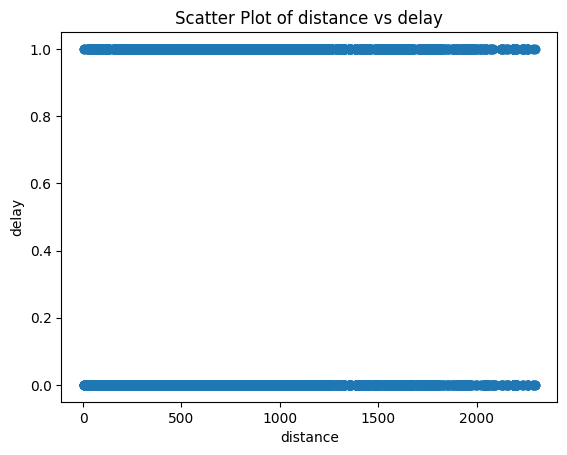

In [22]:
import matplotlib.pyplot as plt
plt.scatter(df['distance'], df['delay']) 
plt.xlabel('distance') 
plt.ylabel('delay') 
plt.title('Scatter Plot of distance vs delay') 
plt.show()

T-statistic: 0.0
P-value: 1.0


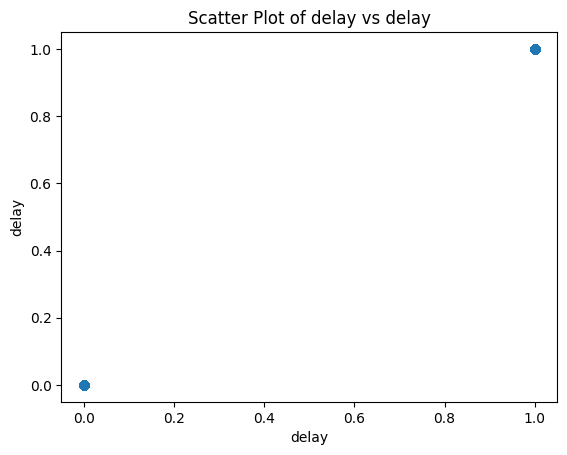

In [23]:
t_stat, p_value = stats.ttest_ind(df['delay'],df['delay'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

plt.scatter(df['delay'], df['delay']) 
plt.xlabel('delay') 
plt.ylabel('delay') 
plt.title('Scatter Plot of delay vs delay') 
plt.show()

T-statistic: 182.80856080893452
P-value: 0.0


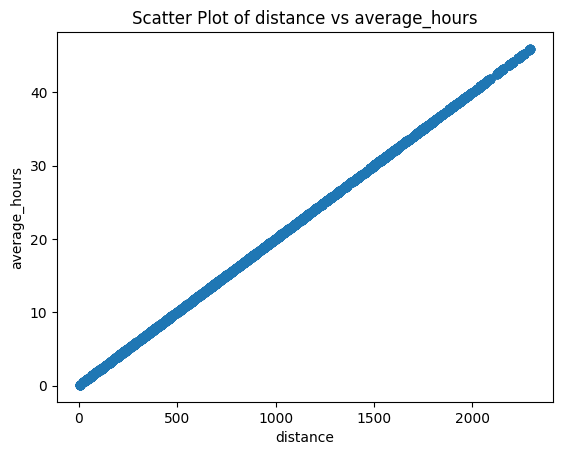

In [27]:
t_stat, p_value = stats.ttest_ind(df['distance'],df['average_hours'])

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

plt.scatter(df['distance'], df['average_hours']) 
plt.xlabel('distance') 
plt.ylabel('average_hours') 
plt.title('Scatter Plot of distance vs average_hours') 
plt.show()

In [28]:
correlation_matrix = df.corr()

print(correlation_matrix)

                                                   delay  truck_age  \
delay                                           1.000000   0.004318   
truck_age                                       0.004318   1.000000   
load_capacity_pounds                           -0.005983  -0.052392   
mileage_mpg                                     0.011576  -0.030949   
age                                             0.014841   0.017407   
...                                                  ...        ...   
city_description_y_Patchy sleet possible       -0.009170  -0.006326   
city_description_y_Patchy snow possible        -0.011591  -0.008865   
city_description_y_Sunny                       -0.073139  -0.002299   
city_description_y_Thundery outbreaks possible  0.018989  -0.005000   
city_description_y_Torrential rain shower      -0.009170  -0.006326   

                                                load_capacity_pounds  \
delay                                                      -0.005983   
tru

In [30]:
spearman_correlation = df.corr(method='spearman') 
print(spearman_correlation)

                                                   delay  truck_age  \
delay                                           1.000000   0.002251   
truck_age                                       0.002251   1.000000   
load_capacity_pounds                           -0.004844  -0.053501   
mileage_mpg                                     0.012061  -0.032866   
age                                             0.017450   0.029466   
...                                                  ...        ...   
city_description_y_Patchy sleet possible       -0.009170  -0.006408   
city_description_y_Patchy snow possible        -0.011591  -0.011690   
city_description_y_Sunny                       -0.073139  -0.005352   
city_description_y_Thundery outbreaks possible  0.018989  -0.001892   
city_description_y_Torrential rain shower      -0.009170  -0.004164   

                                                load_capacity_pounds  \
delay                                                      -0.004844   
tru